# Logistic Regression 


### Customer churn with Logistic Regression
A marketing agency  is concerned about the number of customers stop buying their service. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out the customers most at risk to churn an account manager.



    

<h4>Table of contents</h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Logistic Regression with Python</a></li>
        <li><a href="#ref2">Logistic Regression with Pyspark</a></li>
    </ol>
</div>
<br>


<a id="ref1"></a>
### Logistic Regression with Python

Lets first import required libraries:

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h3 id="understanding_data">Understanding the Data</h3>

In [9]:
churn_df = pd.read_csv("customer_churn.csv")
churn_df.head(1)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.8,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1


The data is saved as customer_churn.csv. Here are the fields and their definitions:

    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Ads Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of websites that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address
    Company: Name of Client Company

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [8]:
churn_df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [14]:
inputCols=['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites','Churn']

In [15]:
churn_df = churn_df[inputCols]

In [16]:
churn_df['Churn'] = churn_df['Churn'].astype('int')
churn_df.head()

C:\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


Lets define X, and y for our dataset:

In [17]:
X = np.asarray(churn_df[['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites']])
X[0:5]

array([[4.200000e+01, 1.106680e+04, 0.000000e+00, 7.220000e+00,
        8.000000e+00],
       [4.100000e+01, 1.191622e+04, 0.000000e+00, 6.500000e+00,
        1.100000e+01],
       [3.800000e+01, 1.288475e+04, 0.000000e+00, 6.670000e+00,
        1.200000e+01],
       [4.200000e+01, 8.010760e+03, 0.000000e+00, 6.710000e+00,
        1.000000e+01],
       [3.700000e+01, 9.191580e+03, 0.000000e+00, 5.560000e+00,
        9.000000e+00]])

In [18]:
y = np.asarray(churn_df['Churn'])
y [0:5]

array([1, 1, 1, 1, 1])

Also, we normalize the dataset:

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.0299361 ,  0.41705373, -0.96290958,  1.52844634, -0.33323478],
       [-0.13335172,  0.76990459, -0.96290958,  0.96318219,  1.36758544],
       [-0.6232152 ,  1.172234  , -0.96290958,  1.09664734,  1.93452551],
       [ 0.0299361 , -0.85243173, -0.96290958,  1.1280509 ,  0.80064537],
       [-0.78650303, -0.36191661, -0.96290958,  0.22519844,  0.2337053 ]])

In [ ]:
## Train/Test dataset

We split our dataset into train and test set:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (720, 5) (720,)
Test set: (180, 5) (180,)


Lets build our model using __LogisticRegression__ from Scikit-learn package. The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [23]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [24]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55115319, 0.44884681],
       [0.50775355, 0.49224645],
       [0.78905855, 0.21094145],
       [0.82586384, 0.17413616],
       [0.75824089, 0.24175911],
       [0.75057247, 0.24942753],
       [0.77136927, 0.22863073],
       [0.82929872, 0.17070128],
       [0.69618372, 0.30381628],
       [0.85843925, 0.14156075],
       [0.7115565 , 0.2884435 ],
       [0.84799908, 0.15200092],
       [0.43464548, 0.56535452],
       [0.79007774, 0.20992226],
       [0.56321142, 0.43678858],
       [0.87795661, 0.12204339],
       [0.78809214, 0.21190786],
       [0.44728951, 0.55271049],
       [0.67567028, 0.32432972],
       [0.77654205, 0.22345795],
       [0.54008405, 0.45991595],
       [0.82353426, 0.17646574],
       [0.89258452, 0.10741548],
       [0.61936631, 0.38063369],
       [0.66148835, 0.33851165],
       [0.79621017, 0.20378983],
       [0.82950855, 0.17049145],
       [0.80546686, 0.19453314],
       [0.81026516, 0.18973484],
       [0.78321259, 0.21678741],
       [0.

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 14  16]
 [  6 144]]


Confusion matrix, without normalization
[[ 14  16]
 [  6 144]]


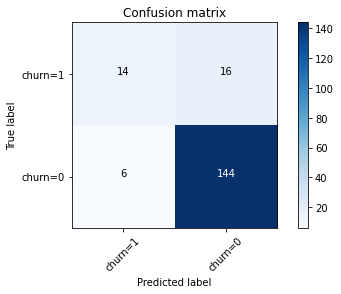

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       150
           1       0.70      0.47      0.56        30

    accuracy                           0.88       180
   macro avg       0.80      0.71      0.74       180
weighted avg       0.87      0.88      0.87       180



The average accuracy for this classifier is the average of the F1-score for both labels, which is 0.87 in our case.

Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.



<a id="ref2"></a>
### Logistic Regression with Pyspark

In [30]:
import findspark

In [31]:
findspark.init()

In [32]:
from pyspark.sql import SparkSession

In [33]:
spark = SparkSession.builder.appName('logregconsult').getOrCreate()

In [36]:
data = spark.read.csv('customer_churn.csv',inferSchema=True,
                     header=True)

In [37]:
data.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



### Check out the data

In [38]:
data.describe().show(1)

+-------+-----+---+--------------+---------------+-----+---------+------------+--------+-------+-----+
|summary|Names|Age|Total_Purchase|Account_Manager|Years|Num_Sites|Onboard_date|Location|Company|Churn|
+-------+-----+---+--------------+---------------+-----+---------+------------+--------+-------+-----+
|  count|  900|900|           900|            900|  900|      900|         900|     900|    900|  900|
+-------+-----+---+--------------+---------------+-----+---------+------------+--------+-------+-----+
only showing top 1 row



### Format for MLlib

We'll ues the numerical columns. We'll include Account Manager because its easy enough, but keep in mind it probably won't be any sort of a signal because the agency mentioned its randomly assigned!

In [40]:
from pyspark.ml.feature import VectorAssembler

In [41]:
assembler = VectorAssembler(inputCols=['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites'],outputCol='features')

In [42]:
output = assembler.transform(data)

In [43]:
final_data = output.select('features','churn')

### Test Train Split

In [44]:
train_churn,test_churn = final_data.randomSplit([0.7,0.3])

### Fit the model

In [45]:
from pyspark.ml.classification import LogisticRegression

In [46]:
lr_churn = LogisticRegression(labelCol='churn')

In [47]:
fitted_churn_model = lr_churn.fit(train_churn)

In [48]:
training_sum = fitted_churn_model.summary

In [49]:
training_sum.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|              churn|         prediction|
+-------+-------------------+-------------------+
|  count|                613|                613|
|   mean|0.17781402936378465|0.12887438825448613|
| stddev|  0.382668372099746|   0.33533449140226|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



### Evaluate results

Let's evaluate the results on the data set we were given (using the test data)

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [51]:
pred_and_labels = fitted_churn_model.evaluate(test_churn)

In [52]:
pred_and_labels.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[22.0,11254.38,1....|    0|[4.05430795643892...|[0.98294832241403...|       0.0|
|[26.0,8939.61,0.0...|    0|[5.77405037803505...|[0.99690247758406...|       0.0|
|[28.0,8670.98,0.0...|    0|[7.23826268284963...|[0.99928195691507...|       0.0|
|[28.0,9090.43,1.0...|    0|[0.94821948475399...|[0.72075696108881...|       0.0|
|[29.0,9617.59,0.0...|    0|[3.91324626692407...|[0.98041565826455...|       0.0|
|[29.0,10203.18,1....|    0|[3.26598082266084...|[0.96324313418667...|       0.0|
|[29.0,11274.46,1....|    0|[4.17445848712145...|[0.98484954751144...|       0.0|
|[29.0,13255.05,1....|    0|[3.93587227636939...|[0.98084540599653...|       0.0|
|[30.0,8403.78,1.0...|    0|[5.44208726208492...|[0.99568823673280...|       0.0|
|[30.0,8677.28,1

### Using AUC

In [53]:
churn_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='churn')

In [54]:
auc = churn_eval.evaluate(pred_and_labels.predictions)

In [55]:
auc

0.7926829268292683

### Predict on brand new unlabeled data


In [56]:
final_lr_model = lr_churn.fit(final_data)

In [57]:
new_customers = spark.read.csv('new_customers.csv',inferSchema=True,
                              header=True)

In [58]:
new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [59]:
test_new_customers = assembler.transform(new_customers)

In [60]:
test_new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- features: vector (nullable = true)



In [61]:
final_results = final_lr_model.transform(test_new_customers)

In [62]:
final_results.select('Company','prediction').show()

+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Cannon-Benson|       1.0|
|Barron-Robertson|       1.0|
|   Sexton-Golden|       1.0|
|        Wood LLC|       0.0|
|   Parks-Robbins|       1.0|
+----------------+----------+



Now we know that we should assign Account Managers to Cannon-Benson,Barron-Robertson,Sexton-GOlden, and Parks-Robbins!